<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #7: Clasificación de textos
`Fecha de entrega: Abril 22, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [24]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [25]:
# Cargar datos
data = pd.read_csv("path.csv")
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


In [11]:
# Cargar datos
path = 
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


### `[8 pts]` Punto 1: Dividir el conjunto de datos en entrenamiento y prueba

In [27]:
data.product_category.value_counts(normalize=True)

jewelry        0.502
video_games    0.498
Name: product_category, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

print(f"Tenemos {data.shape[0]} datos en total.")
print(f"El conjunto de datos de entrenamiento (train) tiene {train.shape[0]} datos.")
print(f"El conjunto de datos de prueba (test) tiene {test.shape[0]} datos.")

Tenemos 1000 datos en total.
El conjunto de datos de entrenamiento (train) tiene 800 datos.
El conjunto de datos de prueba (test) tiene 200 datos.


###  `[8 pts]` Punto 2: Hacer pre-procesamiento del texto

In [38]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords_sp = stopwords.words('spanish')

In [39]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)

In [40]:
X_train = tfidf_vect.fit_transform(train.review_body.values)
y_train = train.product_category.values

X_test = tfidf_vect.transform(test.review_body.values)
y_test = test.product_category.values

print(f"Tamaño de X_train (entrenamiento): {pd.DataFrame(X_train.toarray()).shape}")
print(f"Tamaño de X_test (prueba): {pd.DataFrame(X_test.toarray()).shape}")
print(f"Tamaño de y_train {len(y_train)} y tamaño de y_test {len(y_test)}")

Tamaño de X_train (entrenamiento): (800, 3221)
Tamaño de X_test (prueba): (200, 3221)
Tamaño de y_train 800 y tamaño de y_test 200


###  `[10 pts]` Punto 3: Entrenar el modelo
Puedes escoger el que quieras: Regresión Logística, Naive-Bayes, SVM, Árbol de Decisión, u otro.

In [46]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [47]:
# Inicializar los clasificadores

svm = LinearSVC(class_weight='balanced')


In [48]:
# Entrenamos los modelos

svm.fit(X_train, y_train)


LinearSVC(class_weight='balanced')

###  `[10 pts]` Punto 4: Métricas de evaluación
Exactitud, precisión y sensibilidad

In [52]:
y_pred_svm = svm.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [54]:
#### Exactitud

print(f"SVM: {accuracy_score(y_test, y_pred_svm):>23.2f}")


SVM:                    0.84


In [56]:
metricas = [precision_score, recall_score, f1_score]

for metrica in metricas:
    print(metrica.__name__)
    print(f"SVM: {metrica(y_test, y_pred_svm, pos_label='video_games'):.2f}")
    print()
    

precision_score
SVM: 0.86

recall_score
SVM: 0.83

f1_score
SVM: 0.84



In [57]:
print("SVM")
print(classification_report(y_test, y_pred_svm))
print()

SVM
              precision    recall  f1-score   support

     jewelry       0.82      0.86      0.84        97
 video_games       0.86      0.83      0.84       103

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200




Exactitud: 0.86
precision_score: 0.86
recall_score: 0.86
f1_score: 0.86


###  `[BONUS: 3 pts]` Matriz de confusión

In [59]:
%config InlineBackend.figure_format = 'svg'

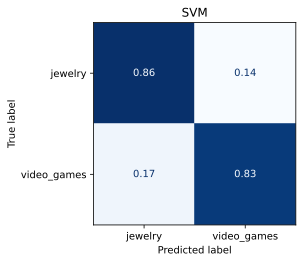

In [60]:

fig = plt.figure(figsize=(10,10))

ax3 = fig.add_subplot(2,2,3)
plot_confusion_matrix(svm, X_test, y_test, cmap = 'Blues', ax=ax3, normalize='true').im_.colorbar.remove() 
plt.title("SVM");


Text(0.5, 1.0, 'Regresión Logística')

<Figure size 1080x1080 with 0 Axes>

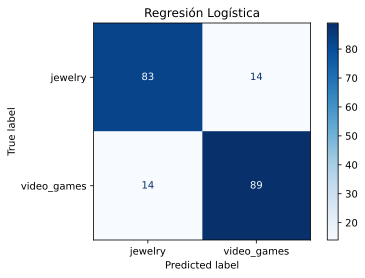

###  `[12 pts]` Punto 5: Términos más importantes de cada categoría

In [62]:
# Explicación 
vocab = {value:key for key,value in tfidf_vect.vocabulary_.items()}
vocab


{1897: 'mismísimo',
 1637: 'juego',
 2077: 'ordenador',
 685: 'creía',
 1840: 'mejorado',
 1424: 'gráficos',
 294: 'bien',
 2466: 'queda',
 670: 'corto',
 103: 'ahora',
 2366: 'primera',
 3144: 'vez',
 583: 'compro',
 149: 'amazon',
 3051: 'ultima',
 2777: 'sido',
 2213: 'perfecta',
 334: 'buenas',
 568: 'compramos',
 517: 'colgante',
 1312: 'forma',
 652: 'corazón',
 2717: 'salido',
 773: 'defectuoso',
 683: 'creo',
 2273: 'plata',
 3160: 'vino',
 373: 'caja',
 2527: 'rayado',
 1511: 'ido',
 2530: 'rayando',
 1744: 'llevándolo',
 705: 'cuerpo',
 370: 'caerse',
 2150: 'pasando',
 701: 'cuello',
 990: 'durado',
 314: 'bonito',
 969: 'dos',
 1001: 'días',
 978: 'duda',
 2108: 'pagaría',
 439: 'casi',
 1895: 'mismo',
 3112: 'vendedor',
 1169: 'esperamos',
 2646: 'respuesta',
 1732: 'llegó',
 1000: 'día',
 2979: 'tocaba',
 2164: 'pedí',
 89: 'agosto',
 911: 'dijeron',
 1728: 'llegaría',
 1672: 'lanzamiento',
 2022: 'noviembre',
 204: 'aquí',
 3154: 'viendo',
 156: 'amigos',
 2030: 'nunca',

In [68]:
# Las palabras que contribuyen a la clase 0
[(vocab[e[0]], round(e[1],2)) for e in zip(svm.coef_[0].argsort(), sorted(svm.coef_[0]))][:10]

[('pulsera', -1.63),
 ('foto', -1.48),
 ('calidad', -1.42),
 ('gracias', -1.4),
 ('bonitos', -1.37),
 ('bonita', -1.27),
 ('cadena', -1.22),
 ('plata', -1.21),
 ('pendientes', -1.19),
 ('cierre', -1.07)]

In [69]:
# Las palabras que contribuyen a la clase 1
[(vocab[e[0]], round(e[1],2)) for e in zip(svm.coef_[0].argsort(), sorted(svm.coef_[0]))][-10:]

[('jugar', 1.11),
 ('descripción', 1.11),
 ('consola', 1.13),
 ('ratón', 1.16),
 ('grupos', 1.23),
 ('botones', 1.31),
 ('ps', 1.34),
 ('hijo', 1.53),
 ('mando', 1.64),
 ('juego', 2.73)]

In [71]:
# Árbol de decisión (feature importances)
[(vocab[e[0]],round(e[1],2)) for e in zip(svm.feature_importances_.argsort(), sorted(svm.feature_importances_))][-10:]

AttributeError: 'LinearSVC' object has no attribute 'feature_importances_'

### `[2 pts]` Punto 6: Pregunta

- ¿Qué interpretación y/o conclusiones saca de su modelo?

In [ ]:
# Es un buen modelo, con buenos resultados en sus métricas.